In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
import re
#pour les représentation
import pylab as P 

In [193]:
datafull = pd.read_excel("Dataset.xlsx", sheet_name="review")

In [194]:
datafull.head()

,rid,user_name,user_numberoffriends,user_numberofreviews,rating,date,numberofuseful,numberoffunny,numberofcool,reviewcontent
0,1,Daphne G.,0,6,5,2016-12-20,1,0,0,I have little experience with Jamaican food bu...
1,1,Sarah H.,276,15,5,2016-12-03,1,0,0,Completely lives up to its name. My husband an...
2,1,Khalia F.,0,12,5,2016-12-02,2,0,0,This place is great! The food is delicious an...
3,1,Foodie M.,3,128,4,2017-02-05,1,0,1,We were looking for some good jerk chicken and...
4,1,Vee N.,19,100,4,2016-12-02,2,0,1,I was in College Park during lunch today and s...


In [278]:
df=datafull.groupby(["rid","rating"]).count()
df.sort_values('reviewcontent',ascending=False).head()

,,user_name,user_numberoffriends,user_numberofreviews,date,numberofuseful,numberoffunny,numberofcool,reviewcontent
rid,rating,,,,,,,,
31,5,412,412,412,412,412,412,412,412
824,5,383,383,383,383,383,383,383,383
156,5,282,282,282,282,282,282,282,282
573,4,277,277,277,277,277,277,277,277
896,4,257,257,257,257,257,257,257,257


The restaurants that they have the high number of review with 5 stars rating are : 31, 824 and 156. We going to analize the reviews of this restaurants.

# The restaurant of Mr. Smith’s

**Extracting Mr. Smith’s restaurant data**

In [225]:
data=datafull[datafull.rid==1]

**Number of Review**

In [226]:
NbrReview= len(data)
NbrReview

209

The total number of reviews of Mr. Smith’s restaurant is 209

**Numberofuseful**

In [227]:
Nbrofuseful=sum(data.numberofuseful)
Nbrofuseful

319

 The total number of votes given by the people considering the review helpful is 319

**Numberoffunny**

In [228]:

Nbroffunny=sum(data.numberoffunny)
Nbroffunny

92

The total number of votes given by the people considering the review funny is 92

**Numberofcool**

In [230]:

Nbrofcool=sum(data.numberofcool)
Nbrofcool

112

The total number of votes given by the people considering the review cool is 112

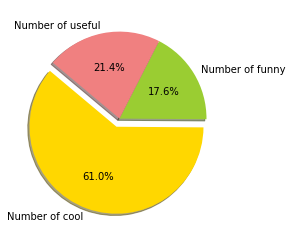

In [153]:
# Data to plot
labels = 'Number of cool', 'Number of funny', 'Number of useful'
sizes = [Nbrofuseful, Nbroffunny, Nbrofcool]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [231]:
from statistics import mean
MoyenneRating= mean(data.rating)
MoyenneRating

4.435406698564593

The average of rating is 4.43. So the average rating is very close to 5 which shows that most of the ratings are good.

**Now we will analyze the ratings**

In [175]:
data.groupby('rating').describe()

rid                                    user_numberoffriends  \
        count mean  std  min  25%  50%  75%  max                count   
rating                                                                  
1         7.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  7.0   
2         5.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  5.0   
3        18.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 18.0   
4        39.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                 39.0   
5       140.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                140.0   

                    ... numberofcool       review_length               \
              mean  ...          75%   max         count         mean   
rating              ...                                                 
1        26.142857  ...          0.0   1.0           7.0  1121.142857   
2         1.000000  ...          0.0   0.0           5.0   968.600000   
3       170.722222  ...          0.0  12.0          18.0   816.222222   
4       110.794872  ...          0.0  14.0          39.0   513.948718   
5        37.492857  ...          0.0   8.0         140.0   494.764286   

                                                             
               std    min      25%     50%      75%     max  
rating                                                       
1       495.142211  101.0  1078.50  1167.0  1411.50  1600.0  
2       960.117076   72.0   226.00   998.0  1054.00  2493.0  
3       487.113413  340.0   482.50   603.0  1019.75  2233.0  
4       465.059756   57.0   208.50   367.0   677.00  2383.0  
5       377.418429   61.0   229.75   388.5   660.75  2541.0  

[5 rows x 56 columns]

We have maximum number of reviews with a 5 star rating with a total of 140 records and the lowest is 7 records for 1 star rating. 

To understand the data more we can create a new feature call review_length. This column will store the number of characters in each review and we will eliminate any white spaces in the review.

In [232]:
data['review_length'] = data['reviewcontent'].apply(lambda x: len(x) - x.count(' '))

Now lets plot some graphs and understand the data.

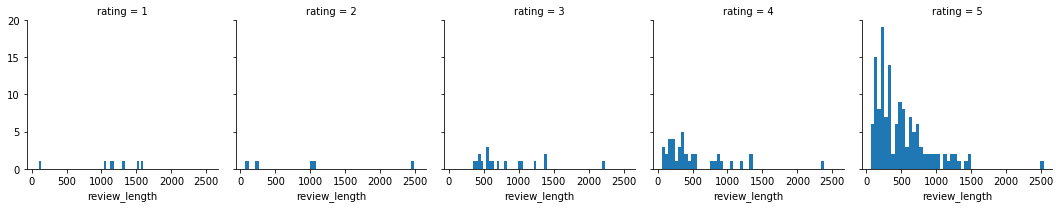

In [233]:
import seaborn as sns
hist = sns.FacetGrid(data=data, col='rating')
hist.map(plt.hist, 'review_length', bins=50)

We see that there are higher number of 4 and 5 star reviews.<br> 
Now lets create a box plot for the same.


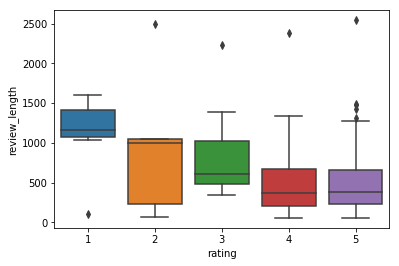

In [157]:
sns.boxplot(x='rating', y='review_length', data=data)

From the box plot it looks like the 2 and 3 star ratings have higher review lengths than the reviews having 5 star rating.<br> So the review length wont be a much useful feature for our sentiment analysis.

<br> <br>

The next step consists in cleaning the text data with various operations:

To clean textual data, we call our custom ‘clean_text’ function that performs several transformations:
<ul>
    <li>
        lower the text</li>
    <li>tokenize the text (split the text into words) and remove the punctuation</li>
    <li>remove useless words that contain numbers</li>
    <li>remove useless stop words like ‘the’, ‘a’ ,’this’ etc.</li>
<li>Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database</li>
<li>lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)</li>
<br>
Now that we have cleaned our data, we can do some feature engineering for our modelization part.
   

In [346]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_review(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return text 

In [332]:
data.reviewcontent = data.reviewcontent.astype(str)

## Feature engineering

We first start by adding sentiment analysis features because we can guess that reviews are highly linked to how they felt about the restaurant. We use textBlob, which is designed for sentiment analysis.<br>
TextBlob uses a lexicon of words to find which ones are positives, negatives or neutrals. It also takes into account the context of the sentences to determine the sentiment scores.
<br>
<br>
For each text, Vader returns 3 values:<br>
a neutrality score<br>
a positivity score<br>
a negativity score<br>

In [333]:
def analize_sentiment(review):  
    analysis = TextBlob(clean_review(review))
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"

In [334]:
data['Sentiment'] = np.array([ analize_sentiment(review) for review in data['reviewcontent'] ])
data.head()

,rid,user_name,user_numberoffriends,user_numberofreviews,rating,date,numberofuseful,numberoffunny,numberofcool,reviewcontent,Sentiment,review_length
0,1,Daphne G.,0,6,5,2016-12-20,1,0,0,I have little experience with Jamaican food bu...,positive,864
1,1,Sarah H.,276,15,5,2016-12-03,1,0,0,Completely lives up to its name. My husband an...,positive,613
2,1,Khalia F.,0,12,5,2016-12-02,2,0,0,This place is great! The food is delicious an...,positive,413
3,1,Foodie M.,3,128,4,2017-02-05,1,0,1,We were looking for some good jerk chicken and...,positive,380
4,1,Vee N.,19,100,4,2016-12-02,2,0,1,I was in College Park during lunch today and s...,positive,796


### Visualisation of results

In [335]:
pos_reviews = [ review for index, review in enumerate(data['reviewcontent']) if data['Sentiment'][index] =="positive"]
neu_reviews = [ review for index, review in enumerate(data['reviewcontent']) if data['Sentiment'][index] == "neutral"]
neg_reviews = [ review for index, review in enumerate(data['reviewcontent']) if data['Sentiment'][index] =="negative"]

In [336]:
print("Pourcentage of positive reviews: {}%".format(len(pos_reviews)*100/len(data['reviewcontent'])))
print("Pourcentage of neutral reviews: {}%".format(len(neu_reviews)*100/len(data['reviewcontent'])))
print("Pourcentage of negative reviews: {}%".format(len(neg_reviews)*100/len(data['reviewcontent'])))

Pourcentage of positive reviews: 94.73684210526316%
Pourcentage of neutral reviews: 0.0%
Pourcentage of negative reviews: 5.2631578947368425%


We can see that 95% of reviews are positive ones, which shows that the restaurant has a good attitude among its customers

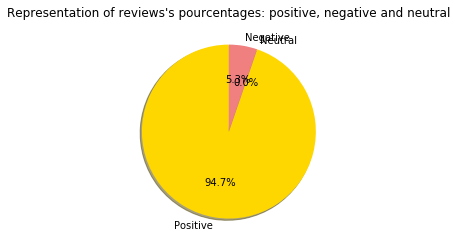

In [337]:

colors = ['gold', 'yellowgreen', 'lightcoral']
sizes = [format(len(pos_reviews)*100/len(data['reviewcontent'])),format(len(neu_reviews)*100/len(data['reviewcontent'])),format(len(neg_reviews)*100/len(data['reviewcontent']))]
labels = 'Positive', 'Neutral','Negative'

## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90,autopct='%1.1f%%'
)
plt.title("Representation of reviews's pourcentages: positive, negative and neutral")
plt.show()

Our dataset is highly imbalanced because more than 94.7% of our reviews are considered as positive ones. 

#### Evolution of reviews per time classified by sentiment 


Count and group reviews by dates

In [338]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].values.astype('<M8[m]')

counting_pos = data.loc[data['Sentiment']
                       =='positive'][['Sentiment','date']].groupby('date').agg(['count'])

counting_neg = data.loc[data['Sentiment']
                       =='negative'][['Sentiment','date']].groupby('date').agg(['count'])

counting_neut = data.loc[data['Sentiment']
                       =='neutral'][['Sentiment','date']].groupby('date').agg(['count'])



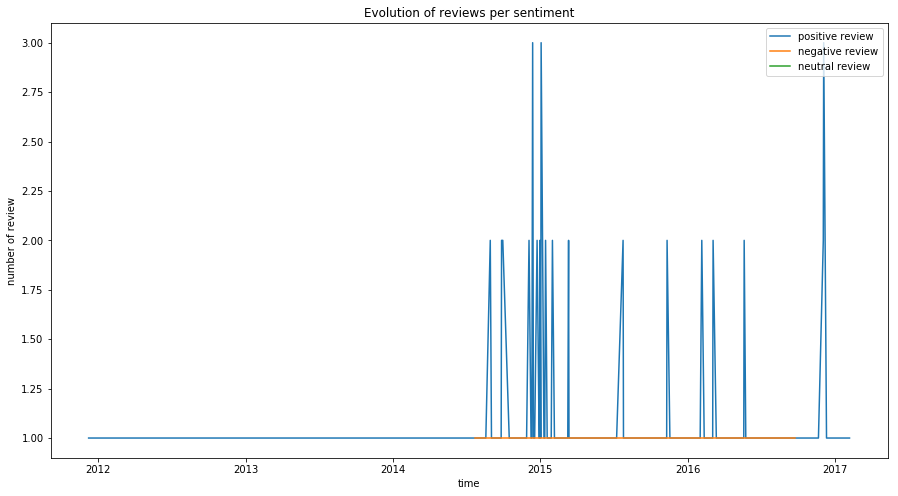

In [259]:
plt.figure(3,figsize=(15, 8))
plt.plot(counting_pos, label='positive review')
plt.plot(counting_neg, label='negative review')
plt.plot(counting_neut, label='neutral review')
plt.xlabel('time')
plt.ylabel('number of review')
plt.title('Evolution of reviews per sentiment')
P.legend(loc='upper right')

we can see that the periods of 2017 and 2015, the restaurant had more positive reviews which shows that the service in these periods was good.

##### Analysis of negative reviews

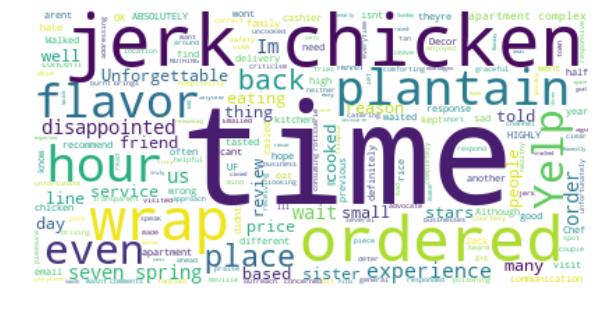

In [339]:
text = " ".join(review for review in neg_reviews)
stopwords = set(STOPWORDS)
stopwords.update(["go","come","got","one","will","really","food","restaurant","dont","Ive","first","amazing"])

wordcloud = WordCloud(max_font_size=100, stopwords=stopwords, background_color="white").generate(text)

fig = plt.figure(1, figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most of the words are indeed related to the food: chicken, flavor, jerk, wrap,rice, etc. Some words are more related to the bad customer experience and the service: disapponited, time, hour, etc.<br> So there are problems in the waiting time and even the price. <br> We can also see the world spring and it means that the restaurant has problems in spring.

##### Analysis of positive reviews

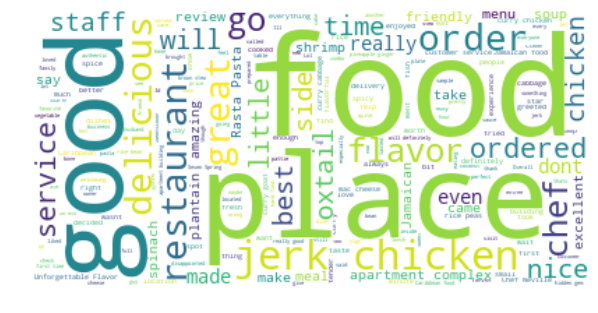

In [340]:
text = " ".join(review for review in pos_reviews)
stopwords = set(STOPWORDS)
stopwords.update(["well", "one", "us", "back", "go'", "didnt", "try", "got", "Ive", "Im"])
wordcloud = WordCloud(max_font_size=100, stopwords=stopwords, background_color="white").generate(text)
fig = plt.figure(1, figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The most positive reviews indeed correspond to some good feedbacks. As we can see the place is recommended. The chef, staff and menu are also good. The best food are chicken, spinach, meal, pasta, rasta, jamaican food, soup ...

## Compare the restaurant to its competitors

In [343]:
comp=datafull[datafull.rid==31]

comp.reviewcontent = comp.reviewcontent.astype(str)

In [347]:
comp['Sentiment'] = np.array([ analize_sentiment(review) for review in comp['reviewcontent'] ])
comp.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,rid,user_name,user_numberoffriends,user_numberofreviews,rating,date,numberofuseful,numberoffunny,numberofcool,reviewcontent,Sentiment
12176,31,Sharnitta R.,117,34,5,2017-02-10,1,1,1,Came here a little after 12:00 noon on 2/9/17 ...,positive
12177,31,Toni V.,0,13,2,2017-02-25,0,0,0,i feel like the food here is over rated. price...,positive
12178,31,LT M.,1,36,4,2017-01-25,0,0,0,"Best chicken, beat crisp and juicy and pollo R...",positive
12179,31,Adam T.,104,61,5,2017-02-22,0,0,0,"If you are willing to wait, which, I recommend...",positive
12180,31,DArcy F.,8,7,5,2017-02-27,0,0,0,The best food Ive tasted in while. Me and my f...,positive


In [349]:
comp.reset_index(inplace = True) 

In [350]:
pos_reviews = [ review for index, review in enumerate(comp['reviewcontent']) if comp['Sentiment'][index] =="positive"]
neu_reviews = [ review for index, review in enumerate(comp['reviewcontent']) if comp['Sentiment'][index] == "neutral"]
neg_reviews = [ review for index, review in enumerate(comp['reviewcontent']) if comp['Sentiment'][index] =="negative"]

##### Analysis of negative reviews

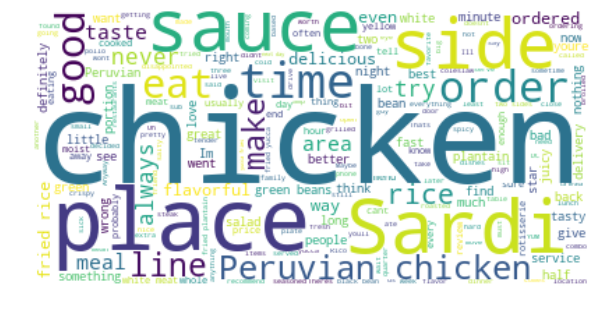

In [351]:
text = " ".join(review for review in neg_reviews)
stopwords = set(STOPWORDS)
stopwords.update(["go","come","got","one","will","really","food","restaurant","dont","Ive","first","well","amazing"])

wordcloud = WordCloud(max_font_size=100, stopwords=stopwords, background_color="white").generate(text)

fig = plt.figure(1, figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most of the words are indeed related to the food: chicken, rice, flavorful, etc. Some words are more related to the bad customer experience and the service: time, hour, etc.<br> So there are problems in the waiting time.

##### Analysis of positive reviews

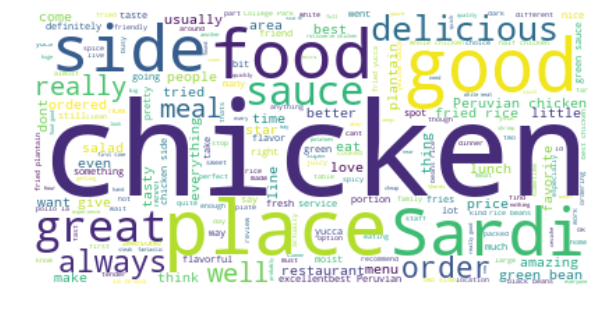

In [352]:
text = " ".join(review for review in pos_reviews)
stopwords = set(STOPWORDS)
stopwords.update(["will", "one", "us", "back", "go", "didnt", "try", "got", "Ive", "Im"])
wordcloud = WordCloud(max_font_size=100, stopwords=stopwords, background_color="white").generate(text)
fig = plt.figure(1, figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The most positive reviews indeed correspond to some good feedbacks. As we can see the place is recommended. The chef, staff and menu are also good. The best food are chicken, bean, meal, sauce, salad.